In [179]:
#import
import numpy as np
import math as math

""" 
Đặt vấn đề:
Giả sử ta có X là các đặc điểm của một căn nhà và Y là các giá trị cả ngôi nhà đó khi đã được cho biết trước
liệu ta có thể dự đoán được giá cả của ngôi nhà khi ta có một X bất kỳ?
Chắc chắn là được. ta sẽ thấy được mối quan hệ tuyến tính giữa đặc điểm của một ngôi nhà với giá cả của ngôi nhà đó
"""

# khởi tạo dữ liệu
X = np.array([10, 22, 31, 42, 54, 72 , 91])  #diện tích của một ngôi nhà ( biến đầu vào X )
y = np.array([1.5, 3.2, 4.8, 6.4, 8.1 ,11, 13 ])   #giá của một ngôi nhà đó ( biến đầu ra Y )

"""
Bias hoặc hệ số chặn (Intercept) là giá trị đầu ra khi tất cả các biến đầu vào bằng 0, 
dùng để biểu diễn sự dịch chuyển (offset) cần thiết để điều chỉnh mô hình sao cho phù hợp với dữ liệu
"""
# Thêm cột 1 vào X để đại diện cho hệ số chặn (bias)
X_b = np.c_[np.ones((len(X), 1)), X]  # Tạo ma trận (n, 2)

# Tính toán các hệ số theta sử dụng công thức  = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

"""
Nếu không muốn giải tích, có thể sử dụng Gradient Descent: lặp lại dần để tối ưu theta
"""
# Khởi tạo gradients
theta = np.zeros(X_b.shape[1])
learning_rate =0.0001
iterations = 100
m = len(y)
# GDescentsDescents
for _ in range(iterations):
    gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
# Dự đoán
y_pred = X_b.dot(theta_best)
y_gradients_pred = X_b.dot(theta)

# Hiển thị kết quả
print("Hệ số theta:", theta_best,)
print("Hệ số theta theo gradient descents là:" ,theta)
print("Dự đoán  giá trị của ngôi nhà sẽ :", y_pred, )
print("Dự đoán  giá trị của ngôi nhà sẽ :", y_gradients_pred, )


Hệ số theta: [0.18629415 0.14501845]
Hệ số theta theo gradient descents là: [0.0028758  0.14801824]
Dự đoán  giá trị của ngôi nhà sẽ : [ 1.63647865  3.37670005  4.6818661   6.27706906  8.01729046 10.62762256
 13.38297312]
Dự đoán  giá trị của ngôi nhà sẽ : [ 1.48305822  3.25927713  4.59144131  6.21964198  7.99586089 10.66018925
 13.47253586]


In [181]:
#tạo hàm return sai so
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
mae_analytic = calculate_mae(y, y_pred)
mse_analytic = calculate_mse(y, y_pred)
mae_gradient = calculate_mae(y, y_gradients_pred)
mse_gradient = calculate_mse(y, y_gradients_pred)
print("Sai số ( giải tích ) của y so với y dự đoán là", mae_analytic)
print("Sai số bình phương ( giải tích )của y so với y dự đoán là:", mse_analytic)
print("Sai số ( gradient ) của y so với y dự đoán là", mae_gradient)
print("Sai số bình phương ( gradient )của y so với y dự đoán là:", mse_gradient)


Sai số ( giải tích ) của y so với y dự đoán là 0.1989005196174408
Sai số bình phương ( giải tích )của y so với y dự đoán là: 0.053013028089464696
Sai số ( gradient ) của y so với y dự đoán là 0.19737447629043223
Sai số bình phương ( gradient )của y so với y dự đoán là: 0.061347568724275506


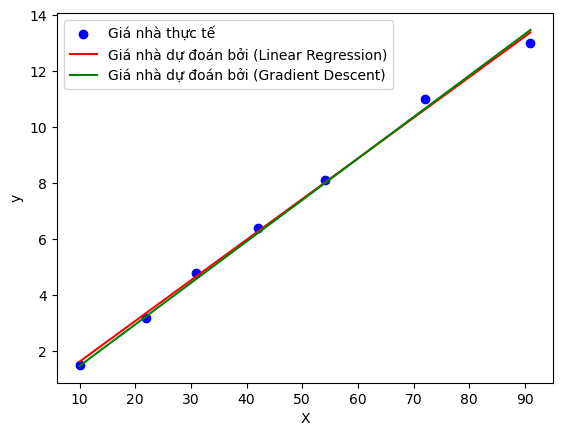

In [183]:
import matplotlib.pyplot as plt
# Dự đoán sau khi tối ưu bằng Gradient Descent
y_pred_gd = X_b.dot(theta)
# Vẽ dữ liệu thực tế
plt.scatter(X, y, color="blue", label="Giá nhà thực tế")

# Vẽ đường hồi quy
plt.plot(X, y_pred, color="red", label="Giá nhà dự đoán bởi (Linear Regression)")
plt.plot(X, y_pred_gd, color="green", label="Giá nhà dự đoán bởi (Gradient Descent)")
# Hiển thị biểu đồ
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()